In [157]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv

### Uploading of betting data

In [158]:
bet1617 = "./Betting data 16:17.csv"
bet1617 = pd.read_csv(bet1617)

In [159]:
bet1617.head()

,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,13/8/16,Burnley,Swansea,A,2.40,3.3,3.25,2.45,3.1,2.95,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,13/8/16,Crystal Palace,West Brom,A,2.00,3.3,4.50,2.00,3.2,3.90,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,13/8/16,Everton,Tottenham,D,3.20,3.4,2.40,2.95,3.2,2.40,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,13/8/16,Hull,Leicester,H,4.50,3.6,1.91,4.33,3.4,1.90,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,13/8/16,Man City,Sunderland,H,1.25,6.5,15.00,1.22,6.0,11.50,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [160]:
bet1617.columns

Index([u'Date', u'HomeTeam', u'AwayTeam', u'FTR', u'B365H', u'B365D', u'B365A',
       u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA', u'LBH', u'LBD', u'LBA',
       u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA', u'VCH', u'VCD', u'VCA',
       u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD', u'BbAvD', u'BbMxA', u'BbAvA',
       u'BbOU', u'BbMx>2.5', u'BbAv>2.5', u'BbMx<2.5', u'BbAv<2.5', u'BbAH',
       u'BbAHh', u'BbMxAHH', u'BbAvAHH', u'BbMxAHA', u'BbAvAHA', u'PSCH',
       u'PSCD', u'PSCA'],
      dtype='object')

### creatingg a new dataframe for date, home team, away team and full time result

In [161]:
bet1617const = bet1617[['Date', 'HomeTeam', 'AwayTeam', 'FTR']].copy()

### sorting of dataframe column headers for those with letter H to look for home team odds
### And then find for  Full time result to be a home win

In [162]:
bet1617Home = bet1617.filter(regex='H')
bet1617Home = bet1617Home.drop(['HomeTeam', 'WHD','WHA','BbAvAHA'], axis=1)
bet1617Home2 = pd.concat([bet1617const,bet1617Home], axis=1, join_axes=[bet1617const.index])
homwwin = bet1617Home2[bet1617Home2["FTR"] == "H"]

### Plotting the number of times each betting company has the highest odds for Home wins

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,u'No. of times with highest odds (HOME wins)')

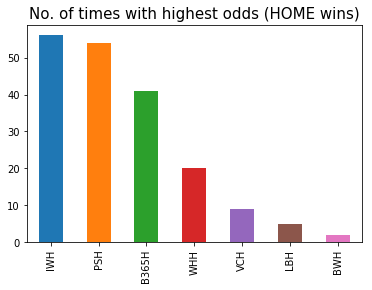

In [210]:
homax = homwwin.loc[:, 'B365H':'VCH']
homwwin["Mean Accurate Odds (HOME)"] = homax.idxmax(axis=1)
fig, ax = plt.subplots()
homwwin["Homwinmax"] = homax.apply( max, axis=1 )
homwwin["Mean Accurate Odds (HOME)"].value_counts().plot(ax=ax, kind='bar')
plt.title('No. of times with highest odds (HOME wins)', fontsize=15)

In [185]:
homwwin.head()

,Date,HomeTeam,AwayTeam,FTR,B365H,BWH,IWH,LBH,PSH,WHH,...,BbAvH,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,PSCH,Homwinbest,Homwinmax,Mean Accurate Odds (HOME)
3,13/8/16,Hull,Leicester,H,4.50,4.33,3.30,4.50,4.43,4.20,...,4.17,31,0.25,2.35,2.26,2.03,4.68,B365H,4.50,B365H
4,13/8/16,Man City,Sunderland,H,1.25,1.22,1.25,1.25,1.27,1.25,...,1.25,34,-1.50,1.81,1.73,2.20,1.25,PSH,1.27,PSH
9,15/8/16,Chelsea,West Ham,H,1.65,1.60,1.65,1.62,1.68,1.67,...,1.64,33,-1.00,2.20,2.10,1.80,1.52,PSH,1.68,PSH
10,19/8/16,Man United,Southampton,H,1.53,1.48,1.40,1.53,1.54,1.44,...,1.52,37,-1.00,2.01,1.92,2.19,1.53,VCH,1.55,VCH
11,20/8/16,Burnley,Liverpool,H,6.50,6.50,5.60,6.50,7.12,7.00,...,6.43,36,1.00,1.98,1.91,2.00,7.26,PSH,7.12,PSH


In [165]:
homwwin["Homwinbest"].value_counts()

IWH      56
PSH      54
B365H    41
WHH      20
VCH       9
LBH       5
BWH       2
Name: Homwinbest, dtype: int64

###  Plotting of the mean accurate odds for home wins by each betting company

Text(0.5,1,u'Mean of highest odds (HOME wins)')

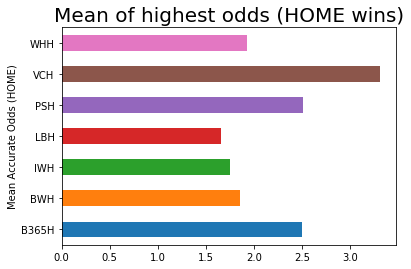

In [208]:
homewinbb = homwwin.groupby("Mean Accurate Odds (HOME)").Homwinmax.mean()
fig, ax = plt.subplots()
homewinbb.plot(ax=ax, kind='barh')
plt.title('Mean of highest odds (HOME wins)', fontsize=20)

homewinbb

### Dorting of dataframe column headers for those with letter 'A' to look for Away team odds.
### Finding for a Full time result to be a Away win.

In [192]:
bet1617Away = bet1617.filter(regex='A')
bet1617Away = bet1617[['B365A', 'BWA', 'IWA', 'LBA', 'PSA','WHA',"VCA"]].copy()
bet1617Away2 = pd.concat([bet1617const,bet1617Away], axis=1, join_axes=[bet1617const.index])
Awaywin = bet1617Away2[bet1617Away2["FTR"] == "A"]

### Plotting the number of times each betting company has the highest odds for Away wins

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,u'No. of times with highest odds (AWAY wins)')

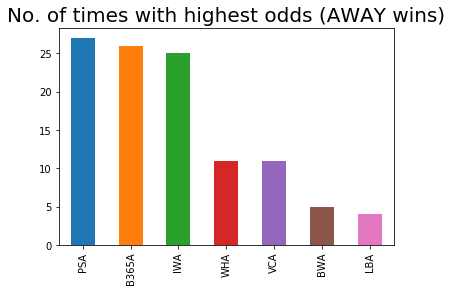

In [209]:
Awmax = Awaywin.loc[:, 'B365A':'VCA']
Awaywin["Mean Accurate Odds (AWAY)"] = Awmax.idxmax(axis=1)
fig, ax = plt.subplots()
Awaywin["Mean Accurate Odds (AWAY)"].value_counts().plot(ax=ax, kind='bar')
Awaywin["Awaywinmax"] = Awmax.apply( max, axis=1 )
plt.title('No. of times with highest odds (AWAY wins)', fontsize=20)

###  Plotting of the mean accurate odds for Away wins by each betting company

Text(0.5,1,u'Mean of highest odds (AWAY wins)')

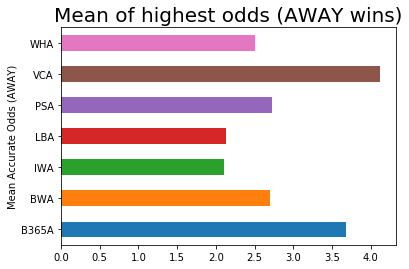

In [211]:
Awaywinbb = Awaywin.groupby("Mean Accurate Odds (AWAY)").Awaywinmax.mean()
fig, ax = plt.subplots()
Awaywinbb.plot(ax=ax, kind='barh')
plt.title('Mean of highest odds (AWAY wins)', fontsize=20)

### Dorting of dataframe column headers for those with letter 'D' to look for Away team odds.
### Finding for a Full time result to be a Away win.

In [170]:
bet1617Draw = bet1617.filter(regex='D')

In [171]:
bet1617Draw = bet1617[['B365D', 'BWD', 'IWD', 'LBD', 'PSD','WHD',"VCD"]].copy()
bet1617Draw2 = pd.concat([bet1617const,bet1617Draw], axis=1, join_axes=[bet1617const.index])
Draw = bet1617Draw2[bet1617Draw2["FTR"] == "D"]

In [172]:
Draw.head()

,Date,HomeTeam,AwayTeam,FTR,B365D,BWD,IWD,LBD,PSD,WHD,VCD
2,13/8/16,Everton,Tottenham,D,3.40,3.2,3.3,3.40,3.43,3.1,3.4
5,13/8/16,Middlesbrough,Stoke,D,3.20,3.1,3.3,3.20,3.24,3.1,3.2
6,13/8/16,Southampton,Watford,D,3.75,3.4,3.5,3.60,3.68,3.4,3.6
12,20/8/16,Leicester,Arsenal,D,3.60,3.6,3.3,3.60,3.60,3.2,3.6
21,27/8/16,Crystal Palace,Bournemouth,D,3.20,3.2,3.3,3.25,3.38,3.2,3.3


### Plotting the number of times each betting company has the highest odds for Draws

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,u'No. of times with highest odds (DRAW)')

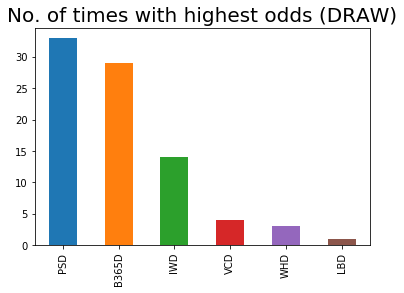

In [212]:
Dmax = Draw.loc[:, 'B365D':'VCD']
Draw["Mean Accurate Odds (DRAW)"] = Dmax.idxmax(axis=1)
fig, ax = plt.subplots()
Draw["Mean Accurate Odds (DRAW)"].value_counts().plot(ax=ax, kind='bar')
Draw["Drawinmax"] = Dmax.apply( max, axis=1 )
plt.title('No. of times with highest odds (DRAW)', fontsize=20)

###  Plotting of the mean accurate odds for Draws by each betting company

Text(0.5,1,u'Mean of highest odds (DRAW)')

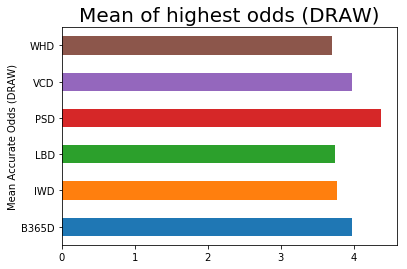

In [213]:
Drawbb = Draw.groupby("Mean Accurate Odds (DRAW)").Drawinmax.mean()
fig, ax = plt.subplots()
Drawbb.plot(ax=ax, kind='barh')
plt.title('Mean of highest odds (DRAW)', fontsize=20)